In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load datasets
data = pd.read_csv("Datasets/drug200.csv")

In [3]:
df = data.copy()

In [4]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [7]:
df.shape

(200, 6)

In [8]:
df.duplicated().sum()

0

In [9]:
numerical_feature = df.columns[data.dtypes != 'object']
categorical_feature = df.columns[data.dtypes == 'object']

In [10]:
numerical_feature

Index(['Age', 'Na_to_K'], dtype='object')

In [11]:
categorical_feature

Index(['Sex', 'BP', 'Cholesterol', 'Drug'], dtype='object')

In [12]:
df['Sex'].value_counts()

Sex
M    104
F     96
Name: count, dtype: int64

In [13]:
df['BP'].value_counts()

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

In [14]:
df['Cholesterol'].value_counts()

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

In [15]:
df['Drug'].value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

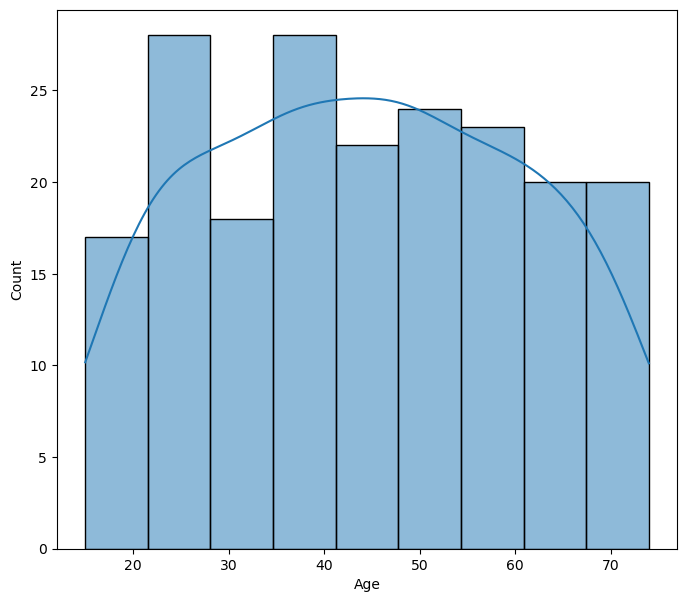

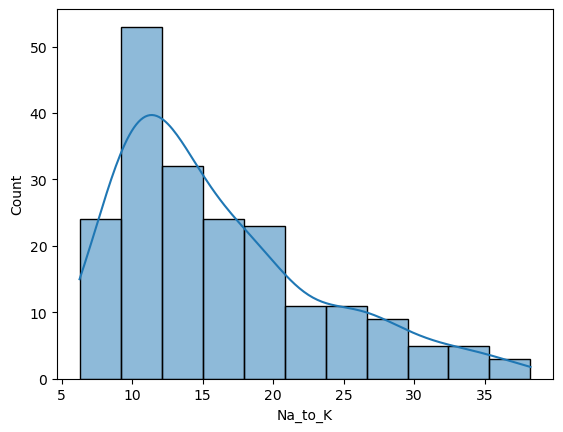

In [16]:
plt.figure(figsize=(8,7))
x= 0
for i in numerical_feature:
    sns.histplot(data=df,x=i,kde=True)
    plt.show()

<Axes: ylabel='Na_to_K'>

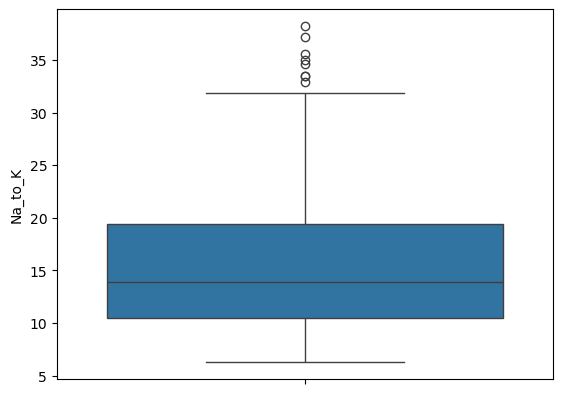

In [17]:
sns.boxplot(df['Na_to_K'])

In [18]:
IQR = df.Na_to_K.quantile(0.75) -  df.Na_to_K.quantile(0.25)

In [19]:
IQR

8.9345

In [20]:
upper_bound = df['Na_to_K'].quantile(0.75) + IQR*3

In [21]:
upper_bound

46.183499999999995

In [22]:
df = df[~(df['Na_to_K']>=30)]

<Axes: ylabel='Na_to_K'>

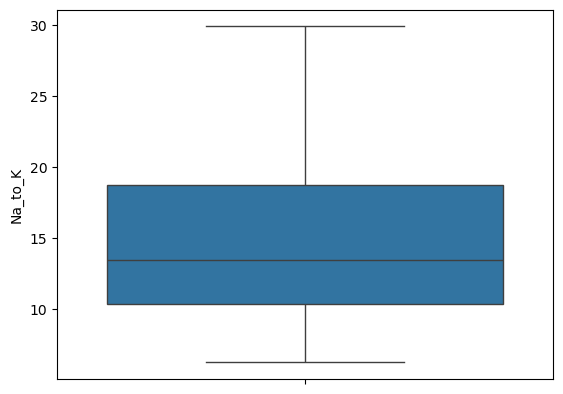

In [23]:
sns.boxplot(df['Na_to_K'])

<Axes: >

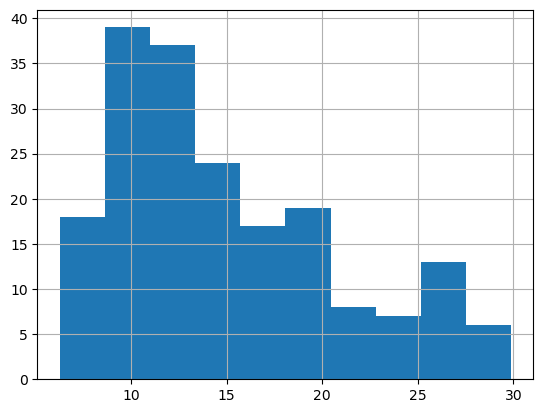

In [48]:
df['Na_to_K'].hist()

In [50]:
categorical_feature

Index(['Sex', 'BP', 'Cholesterol', 'Drug'], dtype='object')

In [52]:
df['Sex'].value_counts()

Sex
M    97
F    91
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

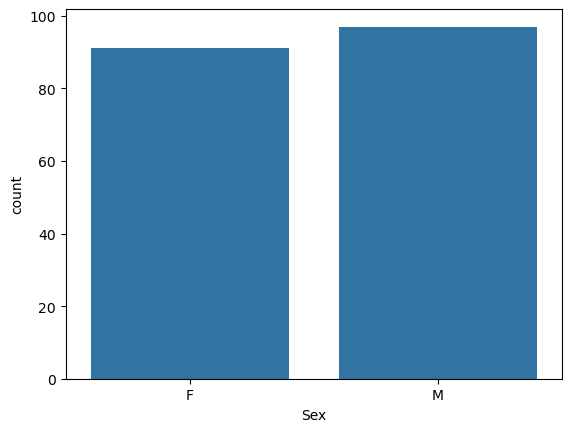

In [58]:
sns.countplot(x = df['Sex'])

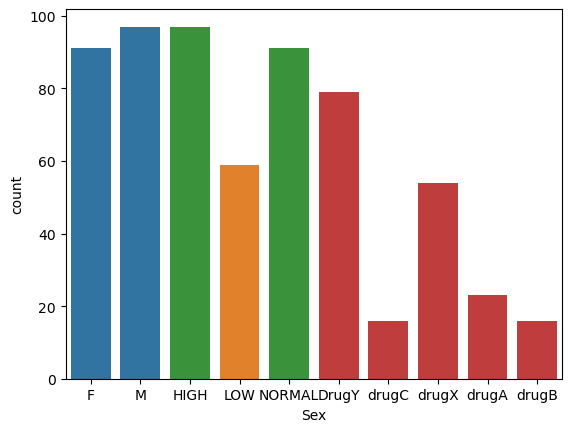

In [64]:
for fea in categorical_feature:
    sns.countplot(x = df[fea])

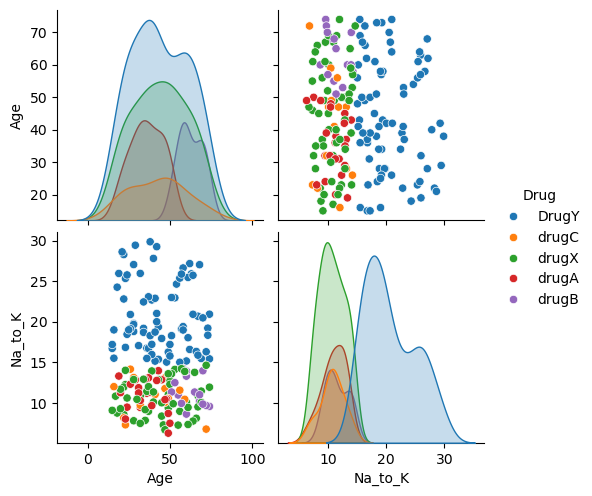

In [70]:
sns.pairplot(df, hue= 'Drug',vars = numerical_feature)

In [76]:
df.to_csv("Datasets/cleandata.csv",index=False)